In [1]:
import numpy as np
import pandas as pd
from WindPy import w
#构建代码列表
#产成品库存数据代码
code_list="M0000561,M0330277,S0000382,S0000550,S0000676,S0000802,S0001096,S0168288,S0001642,M0330279,\
S0001684,S0002566,S0003700,S0004330,S0004498,S0005632,S0006430,S0007018,S0007270,S0007648,S0007942,S0008866,\
S0009118,S0010882,S0011218,S0168330,S0012562,S0014200,S0014410,S0014914,S0016258,S0017980,S0020458,S0021760,S0023230,S0024406,\
S0025582,S0026338,S0005800,S0020710,S0168372,M0330281,S0026800,S0026842".split(',')
#ppi数据代码
ppi_list="M0001227,M0001229,M0001314,M0001315,M0001316,M0001317,M0001318,\
M0001230,M0001230,M0001230,M0001320,M0001321,M0001322,M0001323,M0001269,M0001325,\
M0001327,M0001328,M0001329,M0001330,M0001331,\
M0001332,M0001333,M0001334,M0001335,M0096833,M0001338,M0001339,\
M0001340,M0001341,M0001342,M0001343,M0001344,M0001345,\
M0001346,M0001347,M0001348,M0001349,M0001326,\
M0096839,M0265933,M0001232,M0001351,M0001352".split(',')
#对应序列行业名称
stock_names="工业企业,采矿业,煤炭开采和洗选业,石油和天然气开采业,黑色金属矿采选业,有色金属矿采选业,非金属矿采选业,\
开采专业及辅助性活动,其他采矿业,制造业,农副食品加工业,食品制造业,酒、饮料和精制茶制造业,烟草制品业,纺织业,纺织服装、服饰业,\
木材加工及木、竹、藤、棕、草制品业,家具制造业,造纸及纸制品业,印刷业和记录媒介的复制,文教、工美、体育和娱乐用品制造业,\
石油、煤炭及其他燃料加工业,化学原料及化学制品制造业,医药制造业,化学纤维制造业,橡胶和塑料制品业,非金属矿物制品业,黑色金属冶炼及压延加工业,\
有色金属冶炼及压延加工业,金属制品业,通用设备制造业,专用设备制造业,铁路、船舶、航空航天和其他运输设备制造业,电气机械及器材制造业,\
计算机、通信和其他电子设备制造业,仪器仪表制造业,其他制造业,废弃资源综合利用业,皮革、毛皮、羽毛及其制品和制鞋业,\
汽车制造,金属制品、机械和设备修理业,电力、燃气及水的生产和供应业,燃气生产和供应业,水的生产和供应业".split(',')
#对应申万一级行业指数
sw_name="行业全A,na,煤炭,石油石化,钢铁,有色金属,na,\
na,na,na,食品饮料,食品饮料,食品饮料,na,纺织服饰,纺织服饰,\
轻工制造,轻工制造,轻工制造,轻工制造,轻工制造,\
煤炭,基础化工,医药生物,石油石化,美容护理,建筑材料,钢铁,\
有色金属,钢铁,机械设备,机械设备,国防军工,电力设备,\
电子,机械设备,国防军工,环保,纺织服饰,\
汽车,na,公用事业,公用事业,公用事业".split(',')
sw_code="M0330255,na,V5633102,N9037812,M0045923,M0045924,na,\
na,na,na,M0045931,M0045931,M0045931,na,M0045932,M0045932,\
M0045933,M0045933,M0045933,M0045933,M0045933,\
V5633102,M0045922,M0045934,N9037812,F3759442,M0149881,M0045923,\
M0045924,M0045923,M0149911,M0149911,M0149896,M0149891,\
M0045927,M0149911,M0149896,V7669224,M0045932,\
M0149909,na,M0045935,M0045935,M0045935".split(',')

In [2]:
#选择感兴趣的行业（只需要在上一模块中找到需要的粘贴过来即可）
industry='有色金属矿采选业'
#提取对应需要的序列代码
if industry in stock_names:
    index = stock_names.index(industry)
    print(f"'{industry}' 在列表中的位置是：{index}")
else:
    print(f"'{industry}' 不在列表中")
inv_code=code_list[index]
ppi_code=ppi_list[index]
inv_basic=code_list[0]
ppi_basic=ppi_list[0]

'有色金属矿采选业' 在列表中的位置是：5


In [3]:
sw_code[index]

'M0045924'

In [4]:
#获取今日日期
from datetime import datetime
today_date = datetime.now().date()

#提取对应的行业数据
w.start()
data=w.edb(inv_basic, "2011-12-31", today_date,"Fill=Previous",usedf=True)[1]
data.columns=['inv0']
data['ppi0']=w.edb(ppi_basic, "2011-12-31", today_date,"Fill=Previous",usedf=True)[1]
data['inv']=w.edb(inv_code, "2011-12-31", today_date,"Fill=Previous",usedf=True)[1]
data['ppi']=w.edb(ppi_code, "2011-12-31",today_date,"Fill=Previous",usedf=True)[1]
sw=w.edb("M0330255", "2011-12-31", today_date,"Fill=Previous",usedf=True)[1]
sw['对应申万一级行业指数']=w.edb(sw_code[index],  "2011-12-31", today_date,"Fill=Previous",usedf=True)[1]
w.close()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [5]:
data

,inv0,ppi0,inv,ppi
2011-12-31,20.78,1.69,30.3612,5.85
2012-02-29,18.30,0.03,38.9223,2.86
2012-03-31,16.42,-0.32,38.8665,1.63
2012-04-30,15.80,-0.70,45.9425,-0.59
2012-05-31,14.30,-1.40,42.8752,-2.30
...,...,...,...,...
2023-04-30,5.90,-3.60,-2.1000,2.70
2023-05-31,3.20,-4.60,-3.3000,1.20
2023-06-30,2.20,-5.40,-2.9000,2.80
2023-07-31,1.60,-4.40,-5.4000,6.00


In [6]:
sw.columns=["Wind全A指数","对应申万一级行业指数"]
sw

,Wind全A指数,对应申万一级行业指数
2012-01-04,2089.2793,2942.54
2012-01-05,2057.3379,2852.99
2012-01-06,2070.9780,2911.42
2012-01-09,2134.6294,3064.99
2012-01-10,2198.0198,3223.09
...,...,...
2023-09-22,4764.9443,4366.47
2023-09-25,4738.8540,4325.81
2023-09-26,4716.2422,4284.36
2023-09-27,4733.1914,4277.84


In [7]:
data['dates']=data.index
data=data.reset_index(drop=True)
# 指定开始日期并生成完整日期范围
full_date_range = pd.date_range(start='2011-12-31', end=datetime.now(), freq='M')

# 将日期列设置为DatetimeIndex
data.set_index('dates', inplace=True)

# 重新生成包含完整日期范围的DatetimeIndex
data= data.reindex(full_date_range)
data

,inv0,ppi0,inv,ppi
2011-12-31,20.78,1.69,30.3612,5.85
2012-01-31,NaN,NaN,NaN,NaN
2012-02-29,18.30,0.03,38.9223,2.86
2012-03-31,16.42,-0.32,38.8665,1.63
2012-04-30,15.80,-0.70,45.9425,-0.59
...,...,...,...,...
2023-05-31,3.20,-4.60,-3.3000,1.20
2023-06-30,2.20,-5.40,-2.9000,2.80
2023-07-31,1.60,-4.40,-5.4000,6.00
2023-08-31,2.40,-3.00,-8.3000,8.30


In [8]:
#对数据中的空缺值进行前后两期插值处理
data=data.interpolate()
data

,inv0,ppi0,inv,ppi
2011-12-31,20.78,1.69,30.36120,5.850
2012-01-31,19.54,0.86,34.64175,4.355
2012-02-29,18.30,0.03,38.92230,2.860
2012-03-31,16.42,-0.32,38.86650,1.630
2012-04-30,15.80,-0.70,45.94250,-0.590
...,...,...,...,...
2023-05-31,3.20,-4.60,-3.30000,1.200
2023-06-30,2.20,-5.40,-2.90000,2.800
2023-07-31,1.60,-4.40,-5.40000,6.000
2023-08-31,2.40,-3.00,-8.30000,8.300


In [9]:
#对每一列的数据判断拐点
# 计算四点插值斜率函数
def calculate_slope(series):
    x = np.array([0, 1, 2, 3])
    y = series.values
    coefficients = np.polyfit(x, y, 1)  # 一次线性拟合
    return coefficients[0]  # 返回斜率

# 生成新的DataFrame，用于存储新列
new_columns = pd.DataFrame(index=data.index)

# 对每一列进行计算并生成新列
for column in data.columns:
    new_column = column + '_new'
    new_columns[new_column] = np.nan  # 初始化为空值

    for idx in range(3, len(data) - 3):  # 保证有足够的前后数据
        slope = calculate_slope(data[column].iloc[idx-3:idx+1])

        if slope > 0:
            inv_next_slope = calculate_slope(data[column].iloc[idx:idx+4])
            if inv_next_slope < 0:
                new_columns.at[data.index[idx], new_column] = -1
        elif slope < 0:
            inv_next_slope = calculate_slope(data[column].iloc[idx:idx+4])
            if inv_next_slope > 0:
                new_columns.at[data.index[idx], new_column] = 1

# 将生成的新列添加到原始DataFrame中
data_with_new_columns = pd.concat([data, new_columns], axis=1)

In [10]:
data_with_new_columns

,inv0,ppi0,inv,ppi,inv0_new,ppi0_new,inv_new,ppi_new
2011-12-31,20.78,1.69,30.36120,5.850,NaN,NaN,NaN,NaN
2012-01-31,19.54,0.86,34.64175,4.355,NaN,NaN,NaN,NaN
2012-02-29,18.30,0.03,38.92230,2.860,NaN,NaN,NaN,NaN
2012-03-31,16.42,-0.32,38.86650,1.630,NaN,NaN,-1.0,NaN
2012-04-30,15.80,-0.70,45.94250,-0.590,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...
2023-05-31,3.20,-4.60,-3.30000,1.200,NaN,1.0,NaN,1.0
2023-06-30,2.20,-5.40,-2.90000,2.800,1.0,1.0,NaN,1.0
2023-07-31,1.60,-4.40,-5.40000,6.000,NaN,NaN,NaN,NaN
2023-08-31,2.40,-3.00,-8.30000,8.300,NaN,NaN,NaN,NaN


In [11]:
data.index

DatetimeIndex(['2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31',
               '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30',
               ...
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', length=142, freq='M')

In [12]:
data=data_with_new_columns
#再基于已经有的列生成新的列,这一步的操作是去除一定的噪音，尽量让周期的区间连续

# 生成新的DataFrame，用于存储新列
new_columns = pd.DataFrame(index=data.index)

# 对每一列进行计算并生成新列
for column in ["inv0", "ppi0", "inv", "ppi"]:
    new_column = column + '_mod'
    new_columns[new_column] = np.nan  # 初始化为空值
    for idx in range(3, len(data) - 2):  # 保证有足够的前后数据
        max_value = data[column].iloc[idx-3:idx+2].max()
        min_value = data[column].iloc[idx-3:idx+2].min()
        if data[column].iloc[idx] == max_value or data[column].iloc[idx] == min_value:
            new_columns.at[data.index[idx], new_column] = data["%s_new"%column].iloc[idx]

# 将生成的新列添加到原始DataFrame中
data_with_new_columns2 = pd.concat([data, new_columns], axis=1)

# 打印生成的DataFrame
print(data_with_new_columns2)

             inv0  ppi0       inv    ppi  inv0_new  ppi0_new  inv_new  \
2011-12-31  20.78  1.69  30.36120  5.850       NaN       NaN      NaN   
2012-01-31  19.54  0.86  34.64175  4.355       NaN       NaN      NaN   
2012-02-29  18.30  0.03  38.92230  2.860       NaN       NaN      NaN   
2012-03-31  16.42 -0.32  38.86650  1.630       NaN       NaN     -1.0   
2012-04-30  15.80 -0.70  45.94250 -0.590       NaN       NaN     -1.0   
...           ...   ...       ...    ...       ...       ...      ...   
2023-05-31   3.20 -4.60  -3.30000  1.200       NaN       1.0      NaN   
2023-06-30   2.20 -5.40  -2.90000  2.800       1.0       1.0      NaN   
2023-07-31   1.60 -4.40  -5.40000  6.000       NaN       NaN      NaN   
2023-08-31   2.40 -3.00  -8.30000  8.300       NaN       NaN      NaN   
2023-09-30   2.40 -3.00  -8.30000  8.300       NaN       NaN      NaN   

            ppi_new  inv0_mod  ppi0_mod  inv_mod  ppi_mod  
2011-12-31      NaN       NaN       NaN      NaN      NaN  
201

In [13]:
data_with_new_columns2.head(40)

,inv0,ppi0,inv,ppi,inv0_new,ppi0_new,inv_new,ppi_new,inv0_mod,ppi0_mod,inv_mod,ppi_mod
2011-12-31,20.78,1.6900,30.36120,5.8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,19.54,0.8600,34.64175,4.3550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,18.30,0.0300,38.92230,2.8600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,16.42,-0.3200,38.86650,1.6300,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
2012-04-30,15.80,-0.7000,45.94250,-0.5900,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
2012-05-31,14.30,-1.4000,42.87520,-2.3000,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
2012-06-30,12.90,-2.0800,32.70980,-4.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-31,12.50,-2.8700,25.31000,-5.2000,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2012-08-31,11.26,-3.4800,26.28350,-6.9200,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2012-09-30,10.05,-3.5500,24.44710,-7.0900,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0


In [14]:
data=data_with_new_columns2
# 要填充的列名列表
columns_to_fill = ['inv0_mod', 'ppi0_mod', 'inv_mod', 'ppi_mod']
# 逐列填充指定列的 NaN 值为上方的非空值
data[columns_to_fill] = data[columns_to_fill].fillna(method='ffill')
data.head(30)

,inv0,ppi0,inv,ppi,inv0_new,ppi0_new,inv_new,ppi_new,inv0_mod,ppi0_mod,inv_mod,ppi_mod
2011-12-31,20.78,1.6900,30.36120,5.8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,19.54,0.8600,34.64175,4.3550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,18.30,0.0300,38.92230,2.8600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,16.42,-0.3200,38.86650,1.6300,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
2012-04-30,15.80,-0.7000,45.94250,-0.5900,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
2012-05-31,14.30,-1.4000,42.87520,-2.3000,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
2012-06-30,12.90,-2.0800,32.70980,-4.0500,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
2012-07-31,12.50,-2.8700,25.31000,-5.2000,NaN,1.0,NaN,1.0,NaN,NaN,-1.0,NaN
2012-08-31,11.26,-3.4800,26.28350,-6.9200,NaN,1.0,NaN,1.0,NaN,NaN,-1.0,NaN
2012-09-30,10.05,-3.5500,24.44710,-7.0900,NaN,1.0,NaN,1.0,NaN,1.0,-1.0,1.0


In [15]:
data_part=data.iloc[12:,:]
data_part

,inv0,ppi0,inv,ppi,inv0_new,ppi0_new,inv_new,ppi_new,inv0_mod,ppi0_mod,inv_mod,ppi_mod
2012-12-31,7.19,-1.940,20.29510,-2.460,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0
2013-01-31,7.35,-1.785,17.25115,-2.055,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
2013-02-28,7.51,-1.630,14.20720,-1.650,NaN,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
2013-03-31,8.82,-1.920,16.84410,-2.390,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,1.0,-1.0
2013-04-30,8.00,-2.620,12.99940,-3.800,-1.0,1.0,NaN,NaN,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,3.20,-4.600,-3.30000,1.200,NaN,1.0,NaN,1.0,-1.0,1.0,-1.0,1.0
2023-06-30,2.20,-5.400,-2.90000,2.800,1.0,1.0,NaN,1.0,-1.0,1.0,-1.0,1.0
2023-07-31,1.60,-4.400,-5.40000,6.000,NaN,NaN,NaN,NaN,-1.0,1.0,-1.0,1.0
2023-08-31,2.40,-3.000,-8.30000,8.300,NaN,NaN,NaN,NaN,-1.0,1.0,-1.0,1.0


In [16]:
#根据ppi和产成品库存的趋势定位库存周期（1-4分别代表被动补、主动去、被动去、主动补）
data_part['period_basic']=0
data_part['period']=0
print(data_part)
#计算基准数据
column="ppi0_mod"
column1="inv0_mod"
column2="period_basic"
for idx in range(len(data_part)):
    if data_part[column][idx] == 1 and data_part[column1][idx] == 1:
            data_part[column2][idx] = 4
    if data_part[column][idx] == 1 and data_part[column1][idx] == -1:
            data_part[column2][idx] = 3
    if data_part[column][idx] == -1 and data_part[column1][idx] == 1:
            data_part[column2][idx] = 1
    if data_part[column][idx] == -1 and data_part[column1][idx] == -1:
            data_part[column2][idx] = 2
#计算分行业数据
column="ppi_mod"
column1="inv_mod"
column2="period"
for idx in range(len(data_part)):
    if data_part[column].iloc[idx] == 1 and data_part[column1].iloc[idx] == 1:
            data_part[column2].iloc[idx] = 4
    if data_part[column].iloc[idx] == 1 and data_part[column1].iloc[idx] == -1:
            data_part[column2].iloc[idx] = 3
    if data_part[column].iloc[idx] == -1 and data_part[column1].iloc[idx] == 1:
            data_part[column2].iloc[idx] = 1
    if data_part[column].iloc[idx] == -1 and data_part[column1].iloc[idx] == -1:
            data_part[column2].iloc[idx] = 2
data_part

            inv0   ppi0       inv    ppi  inv0_new  ppi0_new  inv_new  \
2012-12-31  7.19 -1.940  20.29510 -2.460       1.0       NaN      NaN   
2013-01-31  7.35 -1.785  17.25115 -2.055       1.0      -1.0     -1.0   
2013-02-28  7.51 -1.630  14.20720 -1.650       NaN      -1.0     -1.0   
2013-03-31  8.82 -1.920  16.84410 -2.390      -1.0      -1.0      NaN   
2013-04-30  8.00 -2.620  12.99940 -3.800      -1.0       1.0      NaN   
...          ...    ...       ...    ...       ...       ...      ...   
2023-05-31  3.20 -4.600  -3.30000  1.200       NaN       1.0      NaN   
2023-06-30  2.20 -5.400  -2.90000  2.800       1.0       1.0      NaN   
2023-07-31  1.60 -4.400  -5.40000  6.000       NaN       NaN      NaN   
2023-08-31  2.40 -3.000  -8.30000  8.300       NaN       NaN      NaN   
2023-09-30  2.40 -3.000  -8.30000  8.300       NaN       NaN      NaN   

            ppi_new  inv0_mod  ppi0_mod  inv_mod  ppi_mod  period_basic  \
2012-12-31      NaN       1.0       1.0      1.0

E:\myresource\apps\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\myresource\apps\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\myresource\apps\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

,inv0,ppi0,inv,ppi,inv0_new,ppi0_new,inv_new,ppi_new,inv0_mod,ppi0_mod,inv_mod,ppi_mod,period_basic,period
2012-12-31,7.19,-1.940,20.29510,-2.460,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,4,4
2013-01-31,7.35,-1.785,17.25115,-2.055,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,4,4
2013-02-28,7.51,-1.630,14.20720,-1.650,NaN,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1,1
2013-03-31,8.82,-1.920,16.84410,-2.390,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,1.0,-1.0,2,1
2013-04-30,8.00,-2.620,12.99940,-3.800,-1.0,1.0,NaN,NaN,-1.0,-1.0,1.0,-1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,3.20,-4.600,-3.30000,1.200,NaN,1.0,NaN,1.0,-1.0,1.0,-1.0,1.0,3,3
2023-06-30,2.20,-5.400,-2.90000,2.800,1.0,1.0,NaN,1.0,-1.0,1.0,-1.0,1.0,3,3
2023-07-31,1.60,-4.400,-5.40000,6.000,NaN,NaN,NaN,NaN,-1.0,1.0,-1.0,1.0,3,3
2023-08-31,2.40,-3.000,-8.30000,8.300,NaN,NaN,NaN,NaN,-1.0,1.0,-1.0,1.0,3,3


In [17]:
#将申万指数填充到每一天，方便之后与data进行merge
sw1=sw
sw1.index = pd.to_datetime(sw.index)
sw1 = sw1.resample('D').bfill()
#将行业指数的值转化为月度,并与对应周期数值进行merge
merged = sw1.merge(data_part, how='inner', left_index=True, right_index=True)

In [18]:
merged

,Wind全A指数,对应申万一级行业指数,inv0,ppi0,inv,ppi,inv0_new,ppi0_new,inv_new,ppi_new,inv0_mod,ppi0_mod,inv_mod,ppi_mod,period_basic,period
2012-12-31,2223.2400,3408.18,7.19,-1.940,20.29510,-2.460,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,4,4
2013-01-31,2336.4400,3516.22,7.35,-1.785,17.25115,-2.055,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,4,4
2013-02-28,2366.0670,3396.92,7.51,-1.630,14.20720,-1.650,NaN,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1,1
2013-03-31,2244.8436,3071.54,8.82,-1.920,16.84410,-2.390,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,1.0,-1.0,2,1
2013-04-30,2198.8268,2851.46,8.00,-2.620,12.99940,-3.800,-1.0,1.0,NaN,NaN,-1.0,-1.0,1.0,-1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,5062.9556,4795.19,5.90,-3.600,-2.10000,2.700,NaN,NaN,NaN,1.0,-1.0,1.0,-1.0,-1.0,3,2
2023-05-31,4885.2329,4403.02,3.20,-4.600,-3.30000,1.200,NaN,1.0,NaN,1.0,-1.0,1.0,-1.0,1.0,3,3
2023-06-30,4962.3574,4443.81,2.20,-5.400,-2.90000,2.800,1.0,1.0,NaN,1.0,-1.0,1.0,-1.0,1.0,3,3
2023-07-31,5085.0405,4676.04,1.60,-4.400,-5.40000,6.000,NaN,NaN,NaN,NaN,-1.0,1.0,-1.0,1.0,3,3


In [19]:
#得到后，调用对应的申万一级指数进行绘图
#提取所需要的列数据
draw_data=merged[["对应申万一级行业指数","period_basic","period"]]
draw_data.columns=[["%s行业指数（申万一级）"%sw_name[index],"全行业库存周期","%s库存周期"%stock_names[index]]]
draw_data

,有色金属行业指数（申万一级）,全行业库存周期,有色金属矿采选业库存周期
2012-12-31,3408.18,4,4
2013-01-31,3516.22,4,4
2013-02-28,3396.92,1,1
2013-03-31,3071.54,2,1
2013-04-30,2851.46,2,1
...,...,...,...
2023-04-30,4795.19,3,2
2023-05-31,4403.02,3,3
2023-06-30,4443.81,3,3
2023-07-31,4676.04,3,3


1-4分别代表被动补、主动去、被动去、主动补


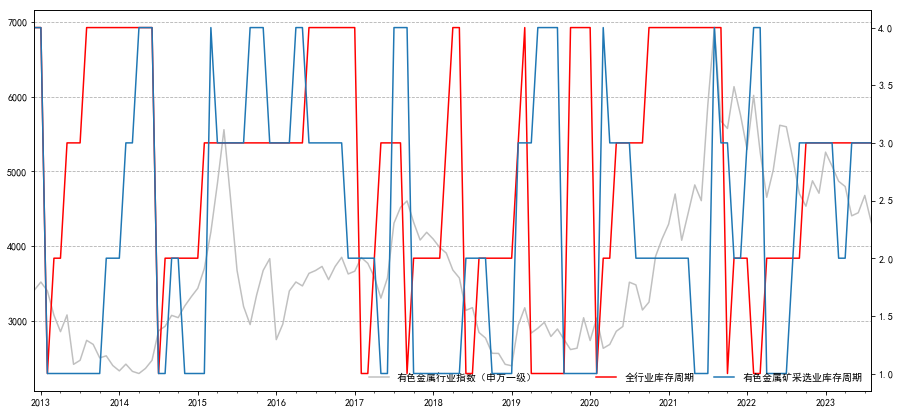

In [25]:
#绘图
import pandas as pd  
import matplotlib.pyplot as plt  
  
from matplotlib.font_manager import FontProperties 
print("1-4分别代表被动补、主动去、被动去、主动补")
  
# 设置字体为SimHei  
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 设置图形支持负数  
plt.rcParams['axes.unicode_minus'] = False

# fig, ax = plt.subplots(figsize = (15, 7))
# # ax.fill_between(HindenburgIndex.index, 0, HindenburgIndex.values, facecolor = 'silver')
# draw_data.iloc[:,0].plot(ax = ax, color = 'silver')
# ax1 = ax.twinx() 
# draw_data.iloc[:,1].plot(ax = ax1)
# draw_data.iloc[:,2].plot(ax = ax1)
# ax.grid(axis = 'y', linestyle='--')
# ax.legend(frameon=False, ncol = 3, loc='lower center')

fig, ax = plt.subplots(figsize=(15, 7))
# ax.fill_between(HindenburgIndex.index, 0, HindenburgIndex.values, facecolor='silver')
draw_data.iloc[:, 0].plot(ax=ax, color='silver', label="%s行业指数（申万一级）" % sw_name[index])

ax1 = ax.twinx()
draw_data.iloc[:, 1].plot(ax=ax1, label='全行业库存周期', color='red')
draw_data.iloc[:, 2].plot(ax=ax1, label="%s库存周期" % stock_names[index])

ax.grid(axis='y', linestyle='--')

# 添加图例
ax.legend(frameon=False, ncol=3, loc='lower center')
ax1.legend(frameon=False, ncol=3, loc='lower right')

plt.show()

In [31]:
from pyecharts.charts import Line, Grid
from pyecharts import options as opts

line = Line()

# 添加数据和配置项
line.add_xaxis(draw_data.index.tolist())  # 将日期索引作为x轴数据
line.add_yaxis("%s行业指数（申万一级）" % sw_name[index], draw_data.iloc[:, 0].tolist(), yaxis_index=0)  # 将data1列作为y轴数据，并命名为"data1"，关联到第一个坐标轴
line.add_yaxis("全行业库存周期", draw_data.iloc[:, 1].tolist(), yaxis_index=1)  # 将data2列作为y轴数据，并命名为"data2"，关联到第二个坐标轴
line.add_yaxis("%s库存周期" % stock_names[index], draw_data.iloc[:, 2].tolist(), yaxis_index=1)  # 将data3列作为y轴数据，并命名为"data3"，关联到第二个坐标轴

# 添加额外的坐标轴
line.extend_axis(yaxis=opts.AxisOpts(name="第二坐标轴"))

# 设置全局配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="%s库存周期" % stock_names[index]),
)

# 设置各个坐标轴的配置项
line.set_series_opts(
    label_opts=opts.LabelOpts(is_show=False),  # 不显示标签
    yaxis_opts=[
        opts.AxisOpts(name="%s行业指数（申万一级）" % sw_name[index]),
        opts.AxisOpts(name="全行业库存周期"),
        opts.AxisOpts(name="%s库存周期" % stock_names[index])
    ],
)

# 渲染图像
line.render("line_chart.html")

'E:\\myresource\\比赛资料\\jupyter\\国泰君安实习\\库存周期\\line_chart.html'